# Demo 1: Linear Regression (Sử dụng sklearn)

In [16]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

#### Đọc dữ liệu, tiền xử lý dữ liệu

In [18]:
df = pd.read_csv('data/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [19]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


## Simple Linear Regresion

### Kiểm tra correlation và chọn 1 thuộc tính

In [20]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


### Xem quan hệ tuyến tính giữa X và y

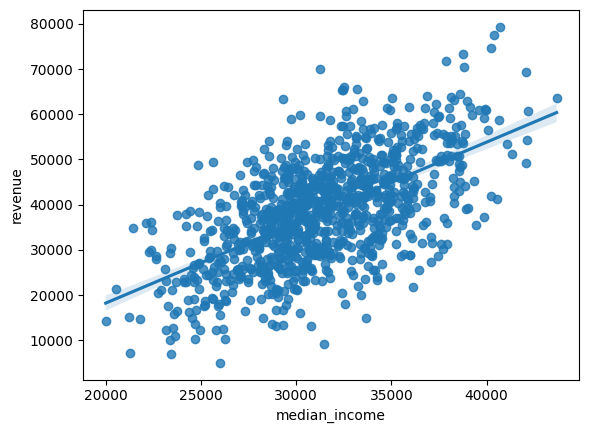

In [21]:
sns.regplot(data=df, x= 'median_income', y='revenue')
plt.show()

###   Chuẩn bị dữ liệu training data/ test data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df[['median_income']] 
y = df['revenue']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 42)

### Tạo đối tượng linear regression cho học trên tập train

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model.fit(X_train,y_train)   

LinearRegression()

In [57]:
intercept = model.intercept_ 
slope = model.coef_[0] 
print(intercept, slope)

-18425.48476274992 1.817572492510132


### Đánh giá mô hình

#####  Dùng các đại lượng thống kê

In [62]:
# Đánh giá trên train
print("model.score:", model.score(X_train, y_train))
print("r2_score:", r2_score(y_train, model.predict(X_train)))

model.score: 0.3802741630505213
r2_score: 0.3802741630505213


In [31]:
# Đánh giá trên tập test
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2, mse, mae )

0.3186154872023862 91722735.6182985 7781.855079949157


##### Dùng biểu đồ đánh giá giữa y và y_predict
- Đặt giới hạn trục x và y là 100000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu. 
- Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế  và dự đoán.

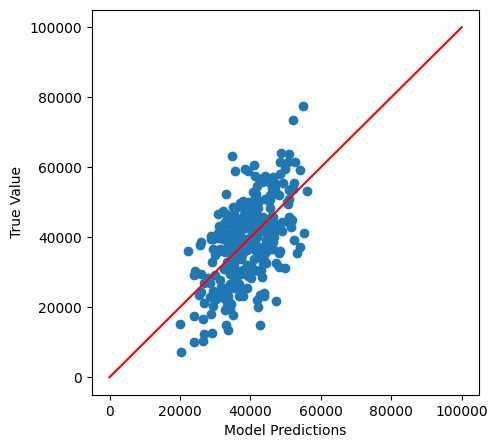

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000],'-r' )
plt.show()

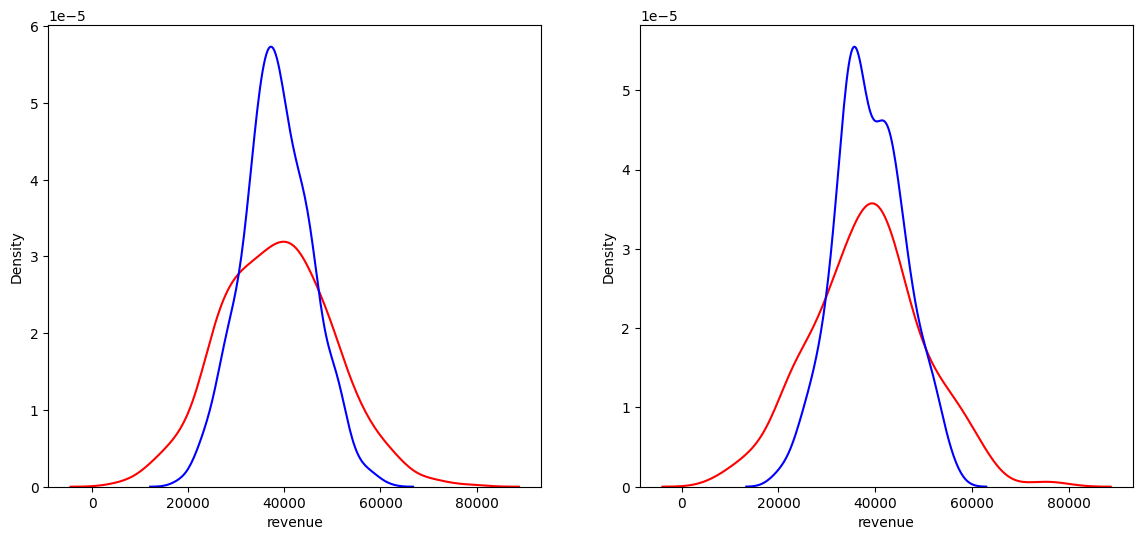

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()

####  Cả  train va test đều có R2 thấp  => model bi underfitting
-   giải pháp là: thêm thuộc tính cho input

## Multiple Linear Regression

###   Chuẩn bị dữ liệu training data/ test data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['num_competitors',
        'median_income',
        'population_density', 
        'num_loyalty_members',
       'location_age'
       ]] # inputs

y = df['revenue'] # output

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

### Tạo đối tượng linear regression cho học trên tập train

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Thực hiện tiếp các bước đánh giá mô hình

##### Dùng các đại lượng thống kê

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2, mse, mae )

0.8210733500078611 23181637.89194377 3930.405229016761


##### Vẽ biểu đồ

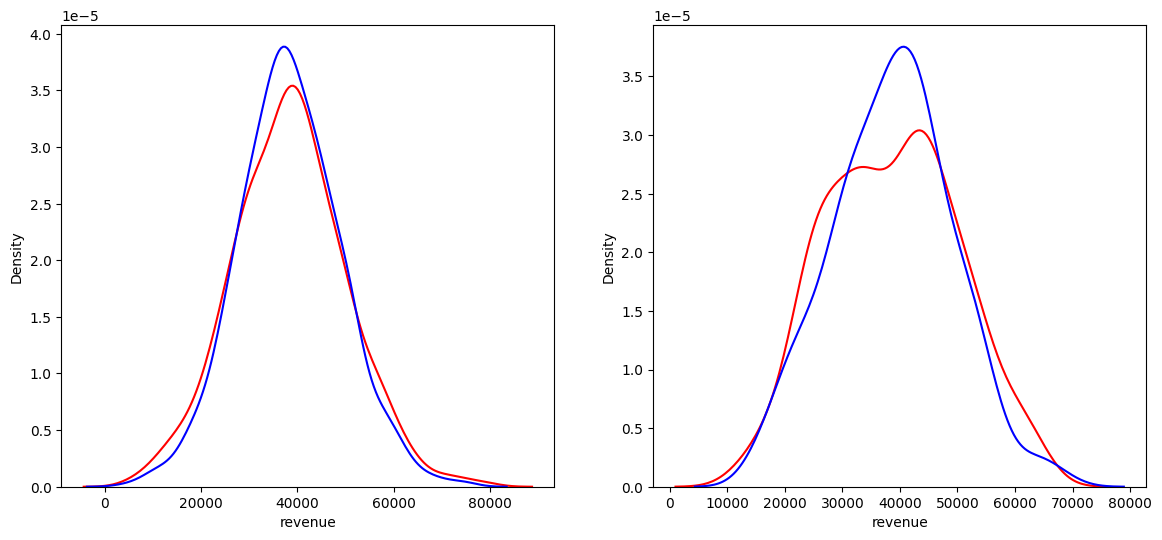

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color="r", 
                   label="Actual Train Values")
sns.distplot(model.predict(X_train), hist=False, color="b", 
             label="Predicted Train Values", ax=ax1)

plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="r", 
                   label="Actual Test Values")
sns.distplot(model.predict(X_test), hist=False, color="b", 
             label="Predicted Test Values" , ax=ax2)

plt.show()

###  Mô hình đã đạt mục tiêu đặt ra. Chọn model.
###  Dự đoán giá trị mới

In [41]:
X_new = pd.DataFrame({
    'num_competitors': [3],
    'median_income': [30000],
    'population_density': [2000],
    'num_loyalty_members': [1200],
    'location_age': [10]
})
X_new

,num_competitors,median_income,population_density,num_loyalty_members,location_age
0,3,30000,2000,1200,10


In [42]:
y_new = model.predict(X_new)
print(y_new)

[27573.21782447]
